# STAT 207 Homework 7 [50 points]

## Central Limit Theorem, Confidence Intervals, and Hypotheses

Due: Friday, March 10 by noon (11:59 am) CST

<hr>

**Note:** For this assignment, you should not use any built-in functions for calculating confidence intervals.  You will not earn credit if you use the built-in confidence interval functions on this assignment.

## Package Imports

Run the cell provided below to import packages needed for this assignment.

You may also need to read in additional packages below.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t

<hr>

## <u>Case Study 1</u>: Preparing to Eat (Confidence Interval of $\mu$ with t-distribution)

We have a random sample of time spent preparing food and drink (in minutes) by American adults in the last 24 hours contained in the food_prep.csv file.  Using this random sample, we will construct and understand a confidence interval in this Case Study.

## 1. Read in the data [1 point]

Read in the data for the food_prep.csv file below.  The data is already cleaned, so you don't need to worry about cleaning the data.  However, you should try to learn a little bit about the data below.

In [3]:
df = pd.read_csv("food_prep.csv")

In [4]:
df.shape

(400, 2)

In [5]:
df.head()

,Unnamed: 0,food_prep
0,1,15
1,2,2
2,3,60
3,4,45
4,5,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  400 non-null    int64
 1   food_prep   400 non-null    int64
dtypes: int64(2)
memory usage: 6.4 KB


In [7]:
df.describe()

,Unnamed: 0,food_prep
count,400.000000,400.000000
mean,200.500000,31.420000
std,115.614301,44.583324
min,1.000000,0.000000
25%,100.750000,0.000000
50%,200.500000,15.000000
75%,300.250000,50.000000
max,400.000000,320.000000


<AxesSubplot: >

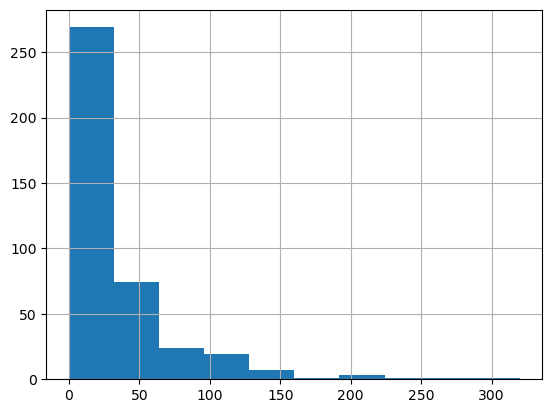

In [8]:
df.food_prep.hist()

## 2. Construct a Confidence Interval [15 points]

We will construct an 88% confidence interval for the average time spent preparing food or drink in the last 24 hours.

**a)**  Define the parameter of interest for our confidence interval.

**Note: the parameter definition should be provided in words and include a symbol.**

**扣分点在于，除了写出symbol，还要把这道题中的具体意义写出来**

The parameter in this case population mean $(\mu)$ time in spent preparing food or drink by all American adults in the last 24 hours.

**b)** Construct an 88% confidence interval for the average time spent preparing food or drink in the last 24 hours.

In [14]:
sample_mean = df.food_prep.mean()
sample_std = df.food_prep.std()
n = df.shape[0]
multiplier = t.ppf(0.94, df = n - 1)
print('sample_mean:',sample_mean)
print('sample_std:',sample_std)
print('multiplier:',multiplier)

sample_mean: 31.42
sample_std: 44.583324034384084
multiplier: 1.5581098659846326


In [12]:
margin_error = multiplier * (sample_std / np.sqrt(n))
lower, upper = sample_mean - margin_error, sample_mean + margin_error
print("Lower bound:", lower, "\nUpper bound:", upper)

Lower bound: 27.94671414818182 
Upper bound: 34.893285851818185


**c)** Put your confidence interval into words.  That is, interpret your confidence interval.

I am 88% confident that the true population mean time spent preparing food or drink by all American adults falls inside the confidence interval (27.95, 34.89) minutes.

**d)** Interpret the confidence level for your interval calculation.

If I repeat this process many times, taking repeated sample size 400 and creating and 88% confidence interval for each of the random samples, then I would expect that 88% of the resulting intervals to contain the true population mean time spent preparing food or drink by American adults in 24 hours.

**e)** State & check the conditions (assumptions) for creating your confidence interval.

Conditions are:
- Random sample of observations from the population.
- Sample size is less than 10% of our population size.
- Sample size is at least 30 OR population is normally distributed.

Chcek:
- The sample is randomly selected according to the background information.
- The observations are independent, because the sample is randomly selected and n is definitely fewer than 10% of US adults population.
- Normality is met because n > 30.

**f)** What distribution did you use to find your multiplier above?  Explain why you used this distribution.

To find the multiplier, I used the t-distribution with n-1=399 degrees of freedom.

I used this distribution because I also had to estimate the standard deviation of population with using another statistic($s$ to estimate $\sigma$), which means I want to add a little extra wiggle room to my confidence interval by using t-distribution.

<hr>

## <u>Case Study 2</u>: Colleges and Universities

We will use a random sample of post-secondary education facilities (colleges & universities) from the United States, including Puerto Rico & other US territories.  The **colleges.csv** file contains a random sample of 135 post-secondary education facilities from the US.  This data comes from: https://www.kaggle.com/yamqwe/colleges-and-universitiese

We will focus on two variables in particular:

- the total dorm capacity of the college or university (`DORM_CAP`)
- the total number of students enrolled (`TOT_ENROLL`)

## 3. Read and prepare the data [3 points] 

You should read in the data from the **colleges.csv** file, perform any cleaning that needs to take place, and create the following variable:

- the variable `dorms`, a logical (Boolean) variable that indicates if the college or university offers dorms (dorm capacity is larger than 0)

**Hint:** For the data cleaning, we only care about the 2 variables defined above.  Consider reasonable values for the `TOT_ENROLL` variable in particular, and remove any colleges or universities that do not have reasonable values recorded.

In [15]:
df_dorms = pd.read_csv("colleges.csv")
df_dorms.shape

(135, 47)

In [19]:
df_dorms.DORM_CAP.unique()

array([   0,  668,   66,  650, 1389,  148,  159,  208,  385, 6566,  746,
        364, 2357, 3142, 1629, 2700, 2021,  454, 1677,  230,  380, 9907,
        220,  450, 1246,  232,  992,  877,  108,  166,  807,  211,  444,
        513,  998,  325, 2762,  680,  518, 1258,  120])

In [20]:
df_dorms.TOT_ENROLL.unique()

array([ 1666,  4216,  4391,  1508,  3407,    77,    95,  2874,   169,
       12260,  3482,    67,   257,  1968,  1658, 23625,   177,    53,
         783,   235,  7406,   294,  2254,   775,   507,  3713,   329,
         312,    80,  1576,   695,    71, 40695,    62,   660,  3118,
        2016,   498,    86,  8368,  2741,   175,   276,   262,   155,
        9573,  4702,   142,   102, 18176,   296,   253,  8775,   408,
         918,   153, 28127,   795,  1153,   244,   371,   186,  1894,
        1107, 10979,   290,  2158,  3693, 13414,  7026,   820,   106,
         205,    22, 21557, 12228,   100,   203,   394,   644,   640,
        3359,   267,   629,  2632,  4149,  1754,  1370,    15,  1026,
         134,    25,   178,    16,    11, 16650,   128,   327,   546,
        1378,   190,   319,  5867,  1116,    96,   464,   605,   400,
         200,   453,  4509,  1148,  8140,   245,    30,   447,  1973,
       11431,    87,    12,  3332,  1400,   529,   981, 10073])

In [17]:
df_dorms = df_dorms[df_dorms.TOT_ENROLL > 0]
df_dorms.shape

(128, 47)

In [21]:
df_dorms['dorms'] = df_dorms.DORM_CAP > 0
df_dorms.head()

,Unnamed: 0,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,...,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID,dorms
0,3003,-73.490213,40.759564,5268,189459,Briarcliffe College,1055 Stewart Ave,NOT AVAILABLE,Bethpage,NY,...,9,2,440,1226,1666,2,0,356,NOT AVAILABLE,False
1,2832,-78.332293,35.501418,5097,198774,Johnston Community College,245 College Road,NOT AVAILABLE,Smithfield,NC,...,3,2,2141,2075,4216,2,0,697,NOT AVAILABLE,False
2,3811,-101.891915,33.589284,1076,229337,Texas Tech University Health Sciences Center,3601 4th Street,NOT AVAILABLE,Lubbock,TX,...,-2,2,916,3475,4391,2,0,5574,NOT AVAILABLE,False
3,5143,-85.196213,34.258192,4408,140988,Shorter University,315 Shorter Ave,NOT AVAILABLE,Rome,GA,...,11,2,130,1378,1508,1,668,319,NOT AVAILABLE,True
5,204,-104.831950,39.676030,7204,460738,American Sentinel University,2260 South Xanadu Way,NOT AVAILABLE,Aurora,CO,...,-3,2,3074,333,3407,2,0,91,NOT AVAILABLE,False


In [22]:
df_dorms.dorms.value_counts()

False    88
True     40
Name: dorms, dtype: int64

## 4. Do Colleges Offer Dorms? [18 points]

Based on our remaining random sample of colleges and universities, we will estimate the proportion of colleges and universities that offer dorms as housing with 75% confidence. 

**a)** Define our parameter of interest in the context of the problem.

$p$, the population proportion of colleges and universities that offer dorms as housing

**b)** State & check the conditions before generating your confidence interval.

In [18]:
p = 40/128
n = df_dorms.shape[0]

In [19]:
n * p

40.0

In [20]:
n * (1 - p)

88.0

### We can conclude that our CI will be valide due to the following evidence.
- Observation is independent.
    - Sampel is ramdomly selected (as is defined by background information)
    - Sample size is less than 10% of population. $n < 0.1N$ (N is the total number of post-secondary schools in US and exceeds 1280.)
- Normality is met as $np > 10$ and $ n(1 - p) > 10$.

**c)** Calculate the 75% confidence interval that estimates the proportion of colleges and universities that offer dorms as housing.

The formula for the confidence interval of proportion is:
$\hat{p} \pm z^*\times\sqrt{\frac{\hat{p} (1-\hat{p})} {n}}$

In [28]:
p_hat = 40/128
n = 128
z_star = norm.ppf(0.75 + 0.25/2)
z_star

1.1503493803760079

In [31]:
margin_error = z_star * np.sqrt(p_hat * (1-p_hat)/n)
margin_error

0.04712877377443001

In [32]:
lower, upper = p_hat - margin_error, p_hat + margin_error
print(lower,",", upper)

0.26537122622556997 , 0.35962877377443003


**d)** Interpret your confidence interval.  That is, put your interval into words.

We are 75% confident that the true population proportion of all post-secondary schools from US that offers dorms is between 0.2654 and 0.3562.

**e)** Based on your confidence interval, respond to the following statement.

Is it reasonable to say that the proportion of all colleges and universities that offer dorms as housing options for students is different from one third (1/3)?

Be sure to explain your answer, and write out the corresponding hypotheses that we could be testing.

**Describe by using confidence interval**

The value of 0.33, which representing 1/3, is contained in the confidence interval. Therefore, it is reasonable for our parameter of interest.

**Describe by using hypothesis test**

$H_0$: $p = 1/3$ The proportion of all colleges and university that offer dorms as housing options for students is one third.

$H_a$: $p \ne 1/3$ The proportion of all colleges and university that offer dorms as housing options for students lower than one third.

Significance Level: $\alpha = 1 - 0.74 = 0.25$

Thus, I would fail to reject the null hypothesis at a significance level of 0.25.

**f)** Suppose that we gather a second random sample of 128 colleges, and record the proportion of colleges and univerisities that offer dorms as housing for this sample.  We generate a second confidence interval for our proportion from this sample, and find that we have a different confidence interval calculated than from part **c** above.  Based on the fact that our confidence interval calculation is different, did we do something wrong during the confidence interval generation?  Explain.

$\hat{p} \pm z^*\times\sqrt{\frac{\hat{p} (1-\hat{p})} {n}}$

We did not do anything incorrect. $z^*, n$ will remain the same as we are also creating a 75% interval. However, as we are gaterng a new sample, $\hat{p}$ might be different.

**g)** Now suppose that we gather 200 random samples of 128 colleges, and record the proportion of colleges and universities that offer dorms as housing for each sample.  We use our sample data for each sample to generate a new 75% confidence interval.  How many of the 200 random samples do you expect to miss the true proportion of colleges and universities that offer dorms as housing for each sample?

In [24]:
200 * (1 - 0.75)

50.0

The confidence level interpretation explains that I would expect 75% of 200 sample would contain the true population proportion.

That means 25% of the confidence intervals of samples will not contain the true proportion.

25% of 200 is 50.

## 5. Average enrollment? [13 points] (Bootsrapped Sampling Method)

The University of Illinois is a large university, with a total enrollment of approximately 44,000.  There are many smaller colleges in the state, including Parkland College with a total enrollment of 9,715.  

We know that there are many more smaller colleges than large universities, so we'd like to test if the average college enrollment is smaller than the enrollment of Parkland College.  

We'd like to perform a hypothesis test using a 10% significance level based on our sample of colleges and universities.

**a)** Write out your hypotheses.  Be sure to use appropriate notation and to define the parameter of interest.

$H_0$: Average college enrollment is similar to the enrollment of Parkland College(9715). $\mu = 9715$

$H_a$: Average college enrollment is lower than the enrollment of Parkland College. $\mu < 9715$

**b)** While we could follow the standard hypothesis testing procedure, we will instead make use of our simulation procedures that we have developed so far this semester.

While we only have our one sample available, we will use it as a stand in for the population.  From our sample, gather a random sample with replacement of the same size as our original sample data.  We will then repeat this process to generate many random samples.  For each of our random samples, calculate and record our statistic of interest.  We will repeat this process 5000 times, and use the 5000 observations of our statistic of interest as a sampling distribution.

Since we are using sample data to generate this sampling distribution, we can refer to our estimated sampling distribution as a **bootstrapped** distribution.

In [34]:
data = []
for i in range(5000):
    mean_enroll = df_dorms.sample(128, replace = True).TOT_ENROLL.mean()
    d = {"mean_enroll" : mean_enroll}
    data.append(d)
df_simulation_result = pd.DataFrame(data)

In [35]:
df_simulation_result

,mean_enroll
0,2760.773438
1,3493.773438
2,2396.421875
3,3590.125000
4,3001.007812
...,...
4995,4058.578125
4996,2814.203125
4997,2887.445312
4998,3474.937500


**c)** Generate a histogram of the **bootstrapped** distribution.

<AxesSubplot: >

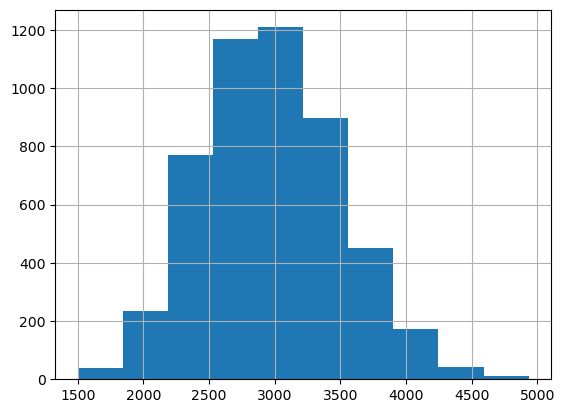

In [36]:
df_simulation_result.mean_enroll.hist()

**d)** Find the middle 80% of the bootstrapped distribution.

We can use this as an approximation for an 80% confidence interval.

*Hint*: Recall that we previously found percentiles for a set of data in Case Study 3 (about Quantitative Variables) when we were finding the IQR.  We can make adjustments to the arguments for the code to help us find the middle 80% of our bootstrapped distribution.

In [41]:
lower = df_simulation_result.mean_enroll.quantile(0.1)
lower

2322.67578125

In [42]:
upper = df_simulation_result.mean_enroll.quantile(0.9)
upper

3668.12109375

In [43]:
print(lower,",", upper)

2322.67578125 , 3668.12109375


**e)** Based on the interval from part **d**, assess the theories in the hypotheses in part **a**.  Which is more reasonable?  Explain.

We reject the null hypothesis, because the 9715 enrollment is far outside the interval, which is really unusual.

The average enrollment is lower than Parkland College's enrollment.

Remember to keep all your cells and hit the save icon above periodically to checkpoint (save) your results on your local computer. Once you are satisified with your results restart the kernel and run all (Kernel -> Restart & Run All). **Make sure nothing has changed**. Checkpoint and exit (File -> Save and Checkpoint + File -> Close and Halt). Follow the instructions on the Homework 4 Canvas Assignment to submit your notebook to GitHub.